# Covid 19 Dataset Harvard
- toc: true
- categories: []

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import chardet

with open('./DATA.csv', 'rb') as f:
    result = chardet.detect(f.read())

covid19_data = pd.read_csv('./DATA.csv', encoding=result['encoding'])

print(covid19_data.columns)  # Display the column names
print(covid19_data.head())  # Display the first few rows of the DataFrame

# Select the columns of interest
selected_columns = ['fainting_now', 'tremors_now', 'Heart_attack']

# Create a subset of the DataFrame with the selected columns
subset = covid19_data[selected_columns]

# Check for null values in the subset
subset_nulls = subset.isnull().sum()

# Fill missing values with 'No' to indicate absence of symptom
subset.fillna('No', inplace=True)

# Create data points based on the presence of symptoms and long COVID
points = []
for _, row in subset.iterrows():
    symptoms = row.values
    if 'Yes' in symptoms and 'Long COVID' in symptoms:
        points.append('Symptoms & Long COVID')
    elif 'Yes' in symptoms:
        points.append('Symptoms')
    elif 'Long COVID' in symptoms:
        points.append('Long COVID')
    else:
        points.append('No Symptoms or Long COVID')

# Count the occurrences of each data point
point_counts = pd.Series(points).value_counts()

# Create a bar plot of data point counts
plt.figure(figsize=(8, 6))
point_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Data Points')
plt.ylabel('Count')
plt.title('Symptoms vs. Long COVID - Data Points')
plt.xticks(rotation=0)
plt.show()


Index(['status,country,sex,ResponseId,CovidPositive,days_acuteCovid,Vaccination_status,No_Doses,Type_vaccine,Hospital_admission,Hospital_readmission,ICU_admission,Recovery,fever,Last_fever,Cause_lastfever,OtherCause_lastfever,Heart_attack,stroke,kidney,DVT,PE,Covid_complications,OtherCovid_complications,PreCovid_conditions,headache_pastweek,persistentCough_pastweek,phlegm_pastweek,anosmia_pastweek,Ageusia_pastweek,SOB_pastweek,Painfulbreathing_pastweek,Chestpain_pastweek,palpitations_pastweek,Weightloss_pastweek,Appetiteloss_pastweek,AbdominalPain_pastweek,NausiaVomiting_pastweek,Constipation_pastweek,Diarrhoea_pastweek,Micturition_pastweek,fatigue_pastweek,Hairloss_pastweek,Headache_pastweek,Persistentcough1_pastweek,Phlegm1_pastweek,Drycough_pastweek,anosmia1_pastweek,ageusia1_pastweek,SOB1_pastweek,Painfulbreathing_now,chestpain_now,palpitations_now,Weightloss_now,Appetiteloss_now,Abdominalpain_now,NauseaVomiting_now,constipation_now,Diarrhoea_now,Micturition_now,Fatigue_now,Hairlos

KeyError: "None of [Index(['fainting_now', 'tremors_now', 'Heart_attack'], dtype='object')] are in the [columns]"

Index(['status,country,sex,ResponseId,CovidPositive,days_acuteCovid,Vaccination_status,No_Doses,Type_vaccine,Hospital_admission,Hospital_readmission,ICU_admission,Recovery,fever,Last_fever,Cause_lastfever,OtherCause_lastfever,Heart_attack,stroke,kidney,DVT,PE,Covid_complications,OtherCovid_complications,PreCovid_conditions,headache_pastweek,persistentCough_pastweek,phlegm_pastweek,anosmia_pastweek,Ageusia_pastweek,SOB_pastweek,Painfulbreathing_pastweek,Chestpain_pastweek,palpitations_pastweek,Weightloss_pastweek,Appetiteloss_pastweek,AbdominalPain_pastweek,NausiaVomiting_pastweek,Constipation_pastweek,Diarrhoea_pastweek,Micturition_pastweek,fatigue_pastweek,Hairloss_pastweek,Headache_pastweek,Persistentcough1_pastweek,Phlegm1_pastweek,Drycough_pastweek,anosmia1_pastweek,ageusia1_pastweek,SOB1_pastweek,Painfulbreathing_now,chestpain_now,palpitations_now,Weightloss_now,Appetiteloss_now,Abdominalpain_now,NauseaVomiting_now,constipation_now,Diarrhoea_now,Micturition_now,Fatigue_now,Hairlos

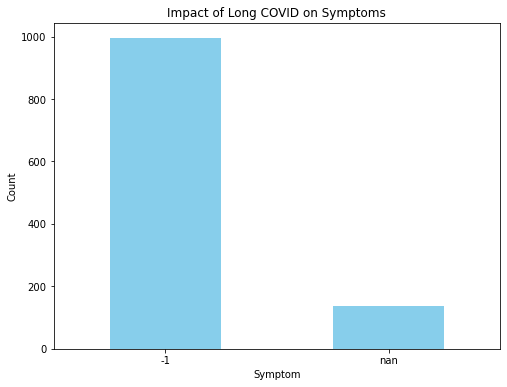

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import chardet

with open('./DATA.csv', 'rb') as f:
    result = chardet.detect(f.read())

covid19_data = pd.read_csv('./DATA.csv', encoding=result['encoding'])

print(covid19_data.columns)  # Display the column names
print(covid19_data.head())  # Display the first few rows of the DataFrame

# Define the keywords and corresponding values for desired symptoms
keywords = {
    'atigue': 'Fatigue',
    'ypertension': 'Hypertension',
    'ttack': 'Heart Attack'
}

# Create a new column to store the symptom values
covid19_data['symptom_value'] = -1

# Search for the keywords in the columns and assign corresponding values
for col in covid19_data.columns:
    covid19_data[col] = covid19_data[col].astype(str)
    covid19_data.loc[covid19_data[col].str.lower().str.contains('|'.join(keywords.keys())), 'symptom_value'] = covid19_data[col].map(keywords)

# Analyze the impact of long COVID on symptoms
long_covid_symptoms = covid19_data[covid19_data['symptom_value'] != -1]

# Count the occurrences of each symptom value for long COVID
symptom_counts = long_covid_symptoms['symptom_value'].value_counts()

# Create a bar plot of symptom value counts
plt.figure(figsize=(8, 6))
symptom_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Symptom')
plt.ylabel('Count')
plt.title('Impact of Long COVID on Symptoms')
plt.xticks(rotation=0)
plt.show()


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import chardet

with open('./DATA.csv', 'rb') as f:
    result = chardet.detect(f.read())

covid19_data = pd.read_csv('./DATA.csv', encoding=result['encoding'])

print(covid19_data.columns)  # Display the column names
print(covid19_data.head())  # Display the first few rows of the DataFrame

# Select the columns of interest for correlation analysis
columns_of_interest = ['CovidPositive', 'Heart_attack']

# Create a subset of the DataFrame with the selected columns
subset = covid19_data[columns_of_interest]

# Compute the correlation matrix
correlation_matrix = subset.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(columns_of_interest)), columns_of_interest, rotation=45)
plt.yticks(range(len(columns_of_interest)), columns_of_interest)
plt.title('Correlation Matrix - COVID-19 and Symptoms')
plt.show()


Index(['status,country,sex,ResponseId,CovidPositive,days_acuteCovid,Vaccination_status,No_Doses,Type_vaccine,Hospital_admission,Hospital_readmission,ICU_admission,Recovery,fever,Last_fever,Cause_lastfever,OtherCause_lastfever,Heart_attack,stroke,kidney,DVT,PE,Covid_complications,OtherCovid_complications,PreCovid_conditions,headache_pastweek,persistentCough_pastweek,phlegm_pastweek,anosmia_pastweek,Ageusia_pastweek,SOB_pastweek,Painfulbreathing_pastweek,Chestpain_pastweek,palpitations_pastweek,Weightloss_pastweek,Appetiteloss_pastweek,AbdominalPain_pastweek,NausiaVomiting_pastweek,Constipation_pastweek,Diarrhoea_pastweek,Micturition_pastweek,fatigue_pastweek,Hairloss_pastweek,Headache_pastweek,Persistentcough1_pastweek,Phlegm1_pastweek,Drycough_pastweek,anosmia1_pastweek,ageusia1_pastweek,SOB1_pastweek,Painfulbreathing_now,chestpain_now,palpitations_now,Weightloss_now,Appetiteloss_now,Abdominalpain_now,NauseaVomiting_now,constipation_now,Diarrhoea_now,Micturition_now,Fatigue_now,Hairlos

KeyError: "None of [Index(['CovidPositive', 'Heart_attack'], dtype='object')] are in the [columns]"